TW performance tracker etc

In [1]:
# Import modules
import os
import csv
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from datetime import datetime

In [2]:
# Define some stuff

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# Read info from csv file
def read_csv(file_name, data_list):
    with open(file_name, newline='') as csvfile:
    
        reader = csv.DictReader(csvfile)
        # Get the total number of rows
        rows = list(reader)
        total_rows = len(rows)
        # Go back to the start of csv file and fill the arrays
        csvfile.seek(0)
        for row in itertools.islice(reader, 1, int(total_rows/4) + 1):
            data_list[0].append(row['Player'])
            data_list[1].append(int(row['Score']))
        
        for row in itertools.islice(reader, 0, int(total_rows/4)):
            data_list[2].append(int(row['Score']))
        
        for row in itertools.islice(reader, 0, int(total_rows/4)):
            data_list[3].append(int(row['Score']))
    
        for row in itertools.islice(reader, 0, int(total_rows/4)):
            data_list[4].append(int(row['Score']))



In [3]:
# Look for the csv files
# and do some processing so we can organise them by date 

path = "." # Path to the csv files
os.chdir(path)
files = []
dates = []
file_date_pair = []        
    
# iterate through all files
for file in os.listdir():
    # Check whether file is in csv format or not
    if file.endswith(".csv"):
        #file_path = f"{path}/{file}"
        files.append(file)
        
        x, month, day, year, y = file.split("_",4)
        my_date = day+"-"+month+"-"+year
        dates.append(my_date)
        
# making pairs
for i in range(len(files)):
    pair = (files[i], dates[i])
    file_date_pair.append(pair)

file_date_pair.sort(key=lambda date: datetime.strptime(date[1], "%d-%b-%Y"))
file_date_pair.reverse()
print(file_date_pair)


[('Mon_May_10_2021_094526_GMT-0700_Pacific_Daylight_Time.csv', '10-May-2021'), ('Thu_May_06_2021_102741_GMT-0700_Pacific_Daylight_Time.csv', '06-May-2021'), ('Mon_Apr_26_2021_042158_GMT-0700_Pacific_Daylight_Time.csv', '26-Apr-2021'), ('Wed_Apr_21_2021_103623_GMT-0700_Pacific_Daylight_Time.csv', '21-Apr-2021')]


In [4]:
# Read in the most recent list of players and data
curr_data = [[] for i in range(6)]

# access the files [0][0] gets the first pair in the list and the first element of the pair (i.e. the most recent csv file).
read_csv(file_date_pair[0][0], curr_data)

for i in range(len(curr_data[0])):
    if curr_data[4][i] != 0:
        #print(data[3][i])
        curr_data[5].append(curr_data[3][i]/curr_data[4][i])
    else:
        curr_data[5].append(0)
        

curr_data=np.array(curr_data, dtype = object).T

#print("Player  |  Total  |  Defence  |  Attack  |  Rogue Actions  |  Efficiency")
#print("")
#print(*curr_data, sep = "\n")



Spicewood Foo 14.0
xcorpio 13.5
Nerf Herder 14.428571428571429
Loreck Avery 14.666666666666666
Sexbobomb 10.333333333333334
Gladiator Motoko 14.0
Heisenberg 11.333333333333334
TAURUS 13.333333333333334


<BarContainer object of 8 artists>

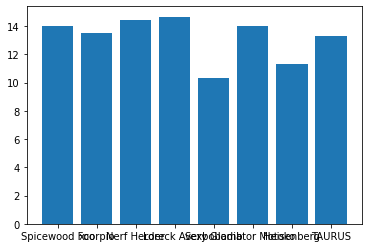

In [5]:
# Plot some stuff
Player = []
Efficiency = []
# Get players with low efficiency 

for i in range(len(curr_data)):
    #print(i)
    if float(curr_data[i][5]) < 15 and float(curr_data[i][5] != 0):
        print(curr_data[i][0], curr_data[i][5])
        Player.append(curr_data[i][0])
        Efficiency.append(curr_data[i][5])
# Offence Banners
#plt.rcParams["figure.figsize"] = (50,50)

plt.bar(Player, Efficiency)


In [6]:
# Get data from the previous TW's
data = [[] for i in range(5)]
for i in range(1, len(file_date_pair)):
    
    read_csv(file_date_pair[i][0], data)
    
data=np.array(data, dtype = object).T
print(*data, sep = "\n")

['Smilol' 233 154 79 9]
['KingK0n' 189 124 65 5]
['Lax Hatif' 293 124 169 11]
['DarthBalken' 270 154 116 6]
['Oicis' 274 184 90 11]
['Spicewood Foo' 270 184 86 7]
['Sem' 196 154 42 3]
['White dead' 211 154 57 3]
['Baxxter Ψ' 251 154 97 5]
['Zakalwe' 253 154 99 6]
['BurglarBeagle' 255 154 74 6]
['Torque' 228 154 101 9]
['Beyla' 233 154 79 7]
['Themi' 255 124 131 11]
['l2ed Leader' 246 154 92 17]
['xcorpio' 325 184 141 16]
['Nerf Herder' 339 154 185 15]
['GrandMoffR10' 291 154 137 10]
['Bluescout99' 220 124 96 9]
['SlizzyFizz' 303 184 119 7]
['ŒArsmant' 193 154 39 4]
['Loreck Avery' 254 154 100 7]
['Sexbobomb' 269 154 115 10]
['DarthYinzer' 309 184 125 9]
['Coimba' 261 184 77 6]
['Gladiator Motoko' 271 218 106 7]
['Corey Gandy' 235 154 53 4]
['SithHunter' 290 184 81 4]
['DarthYoda' 196 124 72 5]
['Shadowcat USM' 269 154 115 6]
['Heisenberg' 179 124 55 4]
['Gibrise USM' 296 184 112 11]
['TAURUS' 191 154 37 2]
['PhoenixRed11' 252 154 98 8]
['Rann' 232 154 78 4]
['Ceth Senpai' 205 124 81 9]

In [7]:
n_entries = len(data)
#print(n_entries)
average_data = [[] for i in range(6)]
tot_banners = 0
tot_def     = 0
tot_att     = 0
tot_RA      = 0

print("Average Banners from the last", len(file_date_pair), "TW's" )
print("")
print("Player        |  Total Banners  |  Defence |  Attack  |  Rogue Actions  |  Efficiency")

for curr_player in curr_data:
    tot_banners = curr_player[1]
    tot_def     = curr_player[2]
    tot_att     = curr_player[3]
    tot_RA      = curr_player[4]
    for player in data:
        if curr_player[0] == player[0]:
            tot_banners += player[1]
            tot_def     += player[2]
            tot_att     += player[3]
            tot_RA      += player[4]
            #print(player[0], tot_banners)
 
    if tot_RA != 0:
        efficiency = tot_att/tot_RA
    else:
        efficiency = 0
       
    average_data[0].append(curr_player[0])
    average_data[1].append(tot_banners/len(file_date_pair))
    average_data[2].append(tot_def/len(file_date_pair))
    average_data[3].append(tot_att/len(file_date_pair))
    average_data[4].append(tot_RA/len(file_date_pair))
    average_data[5].append(efficiency)
    
for player, tot_banners, def_banners, att_banners, RA, eff in zip(*average_data):
    print(player.ljust(20), '%6.2f %12.2f %12.2f %12.2f %12.2f' %(tot_banners, def_banners, att_banners, RA, eff))


Average Banners from the last 4 TW's

Player        |  Total Banners  |  Defence |  Attack  |  Rogue Actions  |  Efficiency
KingK0n              225.00       131.50        92.00         6.25        14.72
Smilol               168.75       115.50        54.75         4.75        11.53
Lax Hatif            209.50        93.00       116.50         6.75        17.26
DarthBalken          200.00       115.50        84.50         4.75        17.79
Oicis                307.75       184.00       123.75         9.25        13.38
Spicewood Foo        189.00       130.50        58.50         4.50        13.00
Sem                  219.00       153.00        66.00         3.75        17.60
White dead           182.25       123.00        59.25         3.25        18.23
Zakalwe              243.25       154.00        89.25         5.00        17.85
Torque               194.50       115.50        85.75         7.00        12.25
BurglarBeagle        236.25       161.50        68.00         4.00        17

Getting info for Spicewood Foo


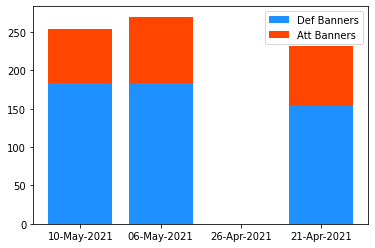

In [10]:
# Graph X players performance
the_chosen_one="Spicewood Foo"
# Boolean to check if player name exists
# Think this checks every element in the list of lists - is fast so don't care it's inefficient 
found_player = the_chosen_one in (item for sublist in curr_data for item in sublist)
chosen_one_tot = []
chosen_one_def = []
chosen_one_att = []
chosen_one_RA  = []
if not found_player:
    print("Couldn't find player:", the_chosen_one)
    print("Maybe check spelling (copy from the above list)")
    
    raise StopExecution
    
else:
    print("Getting info for", the_chosen_one)
    
    for player in curr_data:
        if the_chosen_one == player[0]:
            chosen_one_tot.append(player[1])
            chosen_one_def.append(player[2])
            chosen_one_att.append(player[3])
            chosen_one_RA.append(player[4])
            
    for player in data:
        if the_chosen_one == player[0]:
            chosen_one_tot.append(player[1])
            chosen_one_def.append(player[2])
            chosen_one_att.append(player[3])
            chosen_one_RA.append(player[4])

# Get x-axis - the TW dates
x_axis = []
for date in file_date_pair:
    x_axis.append(date[1])
    
plt.bar(x_axis, chosen_one_def, color = 'dodgerblue')   
# Draw line chart with dashed line
plt.bar(x_axis, chosen_one_att, bottom = chosen_one_def, color = 'orangered')
plt.legend(labels=['Def Banners', 'Att Banners'])
#plt.plot(x_axis, chosen_one_att, linestyle='dashed', color = 'green')
